# Sentiment analysis

The goal for this assignment is to classify feelings in a text corpus. Each row has a sentence with corresponding emotion.

In [1]:
import pandas as pd

import seaborn as sns
import nltk

import ssl 
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context



nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joeloscarsson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/joeloscarsson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/joeloscarsson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
stopwords_default = nltk.corpus.stopwords.words('english')

print(len(stopwords_default))

179


In [3]:
FILE = "./data/emotions.csv"

def get_file():
    """ Get the file and return it as a pandas dataframe"""
    data = pd.read_csv(FILE)
    pd.set_option('display.max_colwidth', 100) # too be able to see more of the text
    return data

In [4]:
get_file()

,text,label
0,i feel so pissed off over an old friend and some friends,anger
1,ive found it has made a huge difference especially on the finger with my ring and the my skin fe...,anger
2,i also feel it is unfortunate that nearly all the readers of going to meet the man will be afric...,sadness
3,i feel petty a href http clairee,anger
4,i used to believe that a feeling like fear was to be ignored or suppressed right away more on th...,sadness
...,...,...
19995,i was i might be buying stuff from there but i feel the clothes are too casual,joy
19996,i like sonam deepika and genelia who i feel are very talented and beautiful,joy
19997,i feel pathetic that i can hardly go a whole day not talking to him,sadness
19998,id have spent more time with her on reading i feel a bit guilty about that,sadness


# Exploration of data


In [5]:
get_file().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20000 non-null  object
 1   label   20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [6]:
get_file()['label'].unique()

array(['anger', 'sadness', 'joy', 'love', 'fear', 'surprise'],
      dtype=object)

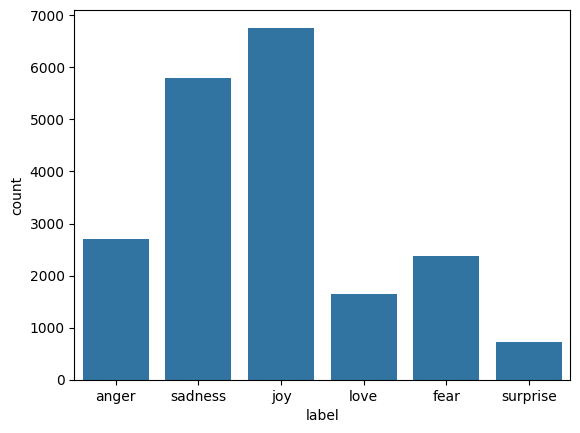

In [7]:
plot = get_file()

sns.countplot(plot, x='label');

We want to separate these 6 emotions into 3 categories. These categories are positive, negative and neutral. We want to group the emotions with corresponding category. 
This means we can re-label to new categories:

* Negative
    - 'anger'
    - 'sadness'
    - 'fear'

* Neutral
    - 'surprise'

* Positive
    - 'joy'
    - 'love'

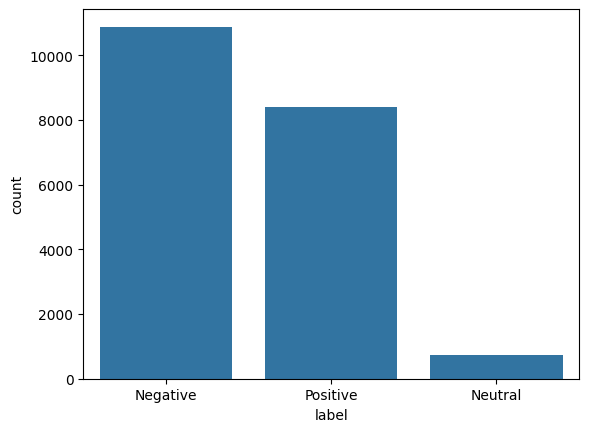

In [8]:
df =  get_file()

label_map = {
    'anger': 'Negative',
    'sadness': 'Negative',
    'fear': 'Negative',
    'surprise': 'Neutral',
    'joy': 'Positive',
    'love': 'Positive',
}

df['label'] = df['label'].map(label_map) # changes the names of the labels to suit the 3 classes

sns.countplot(df, x='label');

So the dataset is not balanced. So this might be an issue that might need to be investigated further if the models tends to be biased towards negative feelings. It might also introduce some challenges with the evaluation since it is not even. 

# Tokenization

In [9]:
df.head()

,text,label
0,i feel so pissed off over an old friend and some friends,Negative
1,ive found it has made a huge difference especially on the finger with my ring and the my skin fe...,Negative
2,i also feel it is unfortunate that nearly all the readers of going to meet the man will be afric...,Negative
3,i feel petty a href http clairee,Negative
4,i used to believe that a feeling like fear was to be ignored or suppressed right away more on th...,Negative


In [10]:
def tokenize(df):
    """
    strip and tokenize the text

    RETURNS: df with tokenized text, each index corresponds to list of tokens from same review
    """

    # strips to lowercase, removes punctuation and whitespace
    df['text'] = df['text'].apply(lambda text: ''.join(case.lower() for case in text if not case.isalpha() or case.isspace()).strip())

    # tokenizes the text
    df['tokenized_text'] = df['text'].apply(lambda row: nltk.word_tokenize(row))

    return df

text = tokenize(df)
new_df = pd.DataFrame({'tokenized_text': text['tokenized_text']})

tokenized_text = new_df['tokenized_text'].explode().reset_index()


display(tokenized_text.head(10))
display(tokenized_text['index'].unique())

,index,tokenized_text
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN


array([    0,     1,     2, ..., 19997, 19998, 19999])